In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
from scipy.interpolate import interp1d

In [2]:
cosmo = Class()

cosmo.set({'gauge':'synchronous',
                  'output_newtonian':'no',
                  'output':'tCl, mPk,lCl',
                  'omega_cdm':0.12038,
                  'recombination':'recfast',
                  'lensing':'yes',
                  'tight_coupling_trigger_tau_c_over_tau_h':0.008,
                  'tight_coupling_trigger_tau_c_over_tau_k':0.001,
                  'tight_coupling_approximation':0,
                  #'a_bidm':0.01,
                  'A_bidm':3e-5,
                  'input_verbose':5,
                  'm_bidm':500,
                  'bidm_type':'resonance',
                  'f_bidm':0.99,
                  'epsilon_bidm':1e-10
                 })
cosmo.compute()


In [3]:
cosmoref = Class()
cosmoref.set({'gauge':'synchronous',
                  'output_newtonian':'no',
                  'output':'tCl, mPk,lCl',
                  'omega_cdm':0.12038,
                  'recombination':'recfast',
                  'lensing':'yes',
                 })
cosmoref.compute()

In [4]:
Th = cosmo.get_thermodynamics()

In [5]:
z = Th['z']
H = np.array([cosmo.Hubble(zz) for zz in Th['z']])
Rbidm = Th['Rbidm']

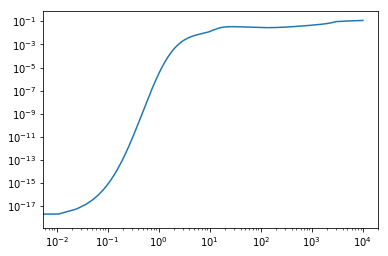

In [6]:
plt.loglog(z,(1+z)*Rbidm/H)

In [66]:
print(Th.keys())

dict_keys(['z', 'conf. time [Mpc]', 'x_e', "kappa' [Mpc^-1]", 'exp(-kappa)', 'g [Mpc^-1]', 'Tb [K]', 'Tbidm [K]', 'Rbidm', 'sigma_b_dm', 'c_b^2', 'tau_d'])


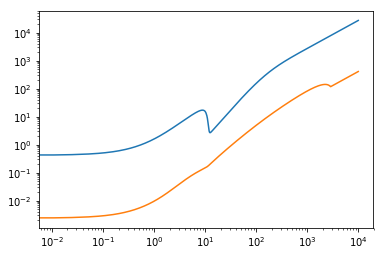

In [7]:
Tb = Th['Tb [K]']
Tdm = Th['Tbidm [K]']
plt.loglog(z,Tb)
plt.loglog(z,Tdm)

/home/markus/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
No handles with labels found to put in legend.


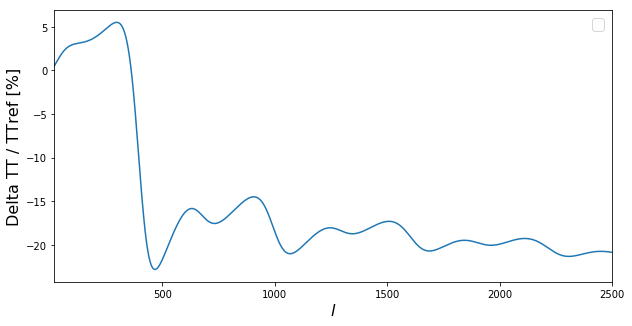

In [8]:
fig = plt.figure(1, figsize = (10,5))
ax = fig.add_subplot(111)
clref = cosmoref.lensed_cl(2500)
TTref = clref['tt']
cl = cosmo.lensed_cl(2500)
l = cl['ell']
TT = cl['tt']
ax.plot(l,100*(TT-TTref)/TTref)
ax.set_xlim(20,2.5e3)
ax.set_xlabel('$l$',fontsize=16)
ax.set_ylabel('Delta TT / TTref [%]',fontsize=16)
ax.legend(fontsize=16)